## A Basic Quantitative Risk Analysis of the FTSEMIB, Italy’s Main Equity Index (1998–2025)
### *Written by Matteo Cunsolo*

In [40]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

##### ***The csv file containing all the data has been downloaded from Investing.com and renamed to FTSEMIB-TR.csv***
##### FTSEMIB Total Return Index ***https://www.investing.com/indices/ftse-mib-tr-eur-historical-data***

In [41]:
prices=pd.read_csv("FTSEMIB-TR.csv"
                  ,header=0, index_col=0, parse_dates=True,
                    na_values=-99.99)
prices

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-12-01,"120,213.77","115,697.41","120,213.77","115,697.41",NaN,3.67%
2025-11-01,"115,958.24","114,289.36","118,439.77","112,778.20",NaN,1.57%
2025-10-01,"114,163.30","113,910.13","114,980.11","110,415.93",NaN,1.05%
2025-09-01,"112,973.41","112,035.22","113,736.52","109,916.81",NaN,1.35%
2025-08-01,"111,471.17","105,518.35","114,414.29","105,518.35",NaN,2.95%
...,...,...,...,...,...,...
1998-05-01,"34,515.98","34,515.98","34,515.98","34,515.98",NaN,5.32%
1998-04-01,"32,771.27","32,771.27","32,771.27","32,771.27",NaN,-5.15%
1998-03-01,"34,550.14","34,550.14","34,550.14","34,550.14",NaN,21.05%


**More about the FTSE MIB:**
A very brief summary of its history.

- **On December 1992:** The original index, **COMIT 30**, was launched by Banca Commerciale Italiana (Which is now called "Intesa San Paolo").
- **On October 1994:** Borsa Italiana took over, renaming it **MIB 30**.
- **On June 2003: S&P/MIB** was launched in parallel.
- **On November 2003:** **S&P/MIB** had replaced MIB 30 as the benchmark.
- **On June 2009:** **S&P/MIB** was finally replaced by the current **FTSE MIB**, with now 40, instead of 30 companies.
  
In short, although the data and analysis are described as referring to the **FTSE MIB**, they actually cover also the earlier **MIB 30** index. (**COMIT 30** data is not included in the dataset, as the dataset starts from 1998).

**We will proceed with the analysis of the index starting from January 1st 1999, because that's when the EURO was firstly introduced in italy and use later on as risk free rate the EURIBOR 1MONTH**

***We will use the FTSEMIB TOTAL RETURN INDEX***  which also accounts for dividends.
We will still use the FSEMIB PRICE INDEX, for graphical comparison


Anyways, enough with the talking, let's start:

# 1) DATA CLEAN-UP AND PRICE PLOTTING
##### The downloaded data it's unfortunately not directly readable as a float, due to the presence of some characters, such as "," inside  the values. 
##### Right now we risk that python will recognize all the values as strings, and we don't want that.
##### We also want to keep the column Change % but we divide it by 100 to get the raw percentage
*Let's start:*

In [42]:
# Firstly we have to convert all columns that should be numbers
cols_to_convert = ['Price', 'Open', 'High', 'Low', 'Change %']
for col in cols_to_convert:
    prices[col] = pd.to_numeric(prices[col].str.replace(',', '').str.replace('%',''), errors='coerce')
    
#We are now dividing the column "Change %" by 100
prices['Change %']=prices['Change %']/100.00

#And renaming all the columns
prices.columns = ['Price', 'Open', 'High', 'Low', 'Volume', 'Return']
prices = prices.sort_index(ascending=True)
prices= prices.loc["1999-01-01":]

##### Now if we again look at the prices we can se that we obtained what we wanted:

In [43]:
prices

,Price,Open,High,Low,Volume,Return
Date,,,,,,
1999-01-01,36158.20,36158.20,36158.20,36158.20,NaN,0.0073
1999-02-01,36819.48,36819.48,36819.48,36819.48,NaN,0.0183
1999-03-01,39154.71,39154.71,39154.71,39154.71,NaN,0.0634
1999-04-01,39257.20,39257.20,39257.20,39257.20,NaN,0.0026
1999-05-01,37876.07,37876.07,37876.07,37876.07,NaN,-0.0352
...,...,...,...,...,...,...
2025-08-01,111471.17,105518.35,114414.29,105518.35,NaN,0.0295
2025-09-01,112973.41,112035.22,113736.52,109916.81,NaN,0.0135
2025-10-01,114163.30,113910.13,114980.11,110415.93,NaN,0.0105


### Now we plot just the closing prices for a quick line graph of the performance of FTSEMIB, dividend included since the oldest date available:

<Axes: title={'center': 'Price Over Time'}, xlabel='Date'>

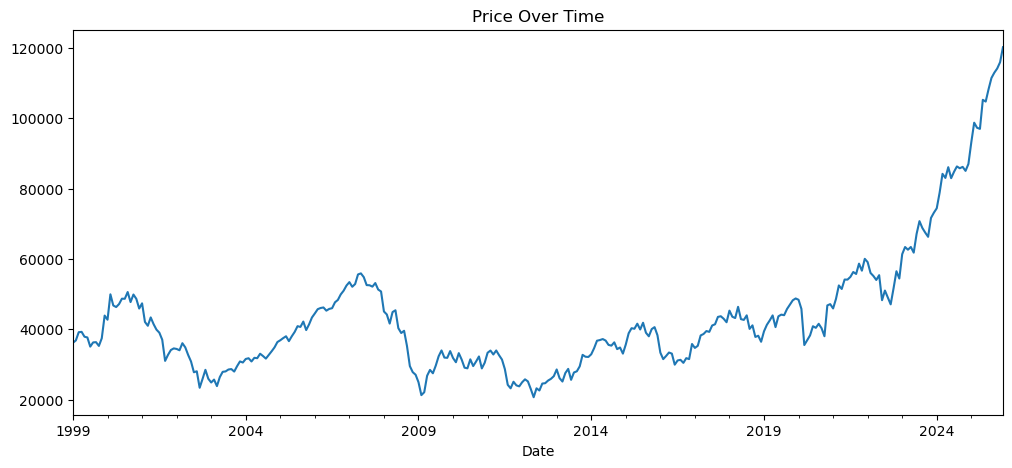

In [44]:
prices['Price'].plot.line(title='Price Over Time', figsize=(12,5))

# 2) Historical Monthly Returns (up to December 2025)

 We already have the returns on the csv file, but we are going to compute it anyway to see if it matches


In [45]:
prices["returns"] = prices[['Price']].pct_change().dropna()  # Double brackets create a DataFrame, shift because of N.As for the last date 
# as there is no date after to compare it to)
# there is a - in front of prices because the returns would otherwise be flipped as pct_change calculates (old- new)/new 
prices

,Price,Open,High,Low,Volume,Return,returns
Date,,,,,,,
1999-01-01,36158.20,36158.20,36158.20,36158.20,NaN,0.0073,NaN
1999-02-01,36819.48,36819.48,36819.48,36819.48,NaN,0.0183,0.018289
1999-03-01,39154.71,39154.71,39154.71,39154.71,NaN,0.0634,0.063424
1999-04-01,39257.20,39257.20,39257.20,39257.20,NaN,0.0026,0.002618
1999-05-01,37876.07,37876.07,37876.07,37876.07,NaN,-0.0352,-0.035182
...,...,...,...,...,...,...,...
2025-08-01,111471.17,105518.35,114414.29,105518.35,NaN,0.0295,0.029485
2025-09-01,112973.41,112035.22,113736.52,109916.81,NaN,0.0135,0.013476
2025-10-01,114163.30,113910.13,114980.11,110415.93,NaN,0.0105,0.010532


In [46]:
#Checking if the returns match or not
same = np.allclose(prices['Return'], prices['returns'])
print(same)

False


### We have found out that the returns don't match to the one we have on the csv, the reason is obvious by looking at the return.head() : the values are approximated
#### We are now going to use our calculated values to advance in further analysis due to the superior decimal precision
##### We substitute the values in the colon Return with the Returns that we have just calculated:

In [47]:
prices['Return']= prices['returns']

#### We now have a more precise Returns column:

In [48]:
del prices["returns"]


In [49]:
prices.loc[prices.index[0], "Return"] = 0.0073	 
#here i am basically hardcoding the return from the csv of the first day, because calculated returns gives us a Na value as there is no price value in the dataset for dates previous of 01-01-1998
# this, even if it has less decimal precision is still better than an Na value
#the value is present previously before calculating the returns, and also in the csv

In [50]:
prices

,Price,Open,High,Low,Volume,Return
Date,,,,,,
1999-01-01,36158.20,36158.20,36158.20,36158.20,NaN,0.007300
1999-02-01,36819.48,36819.48,36819.48,36819.48,NaN,0.018289
1999-03-01,39154.71,39154.71,39154.71,39154.71,NaN,0.063424
1999-04-01,39257.20,39257.20,39257.20,39257.20,NaN,0.002618
1999-05-01,37876.07,37876.07,37876.07,37876.07,NaN,-0.035182
...,...,...,...,...,...,...
2025-08-01,111471.17,105518.35,114414.29,105518.35,NaN,0.029485
2025-09-01,112973.41,112035.22,113736.52,109916.81,NaN,0.013476
2025-10-01,114163.30,113910.13,114980.11,110415.93,NaN,0.010532


#### Quick plot of the returns for visual clarification:

<Axes: title={'center': 'Monthly Returns over the years'}, xlabel='Date'>

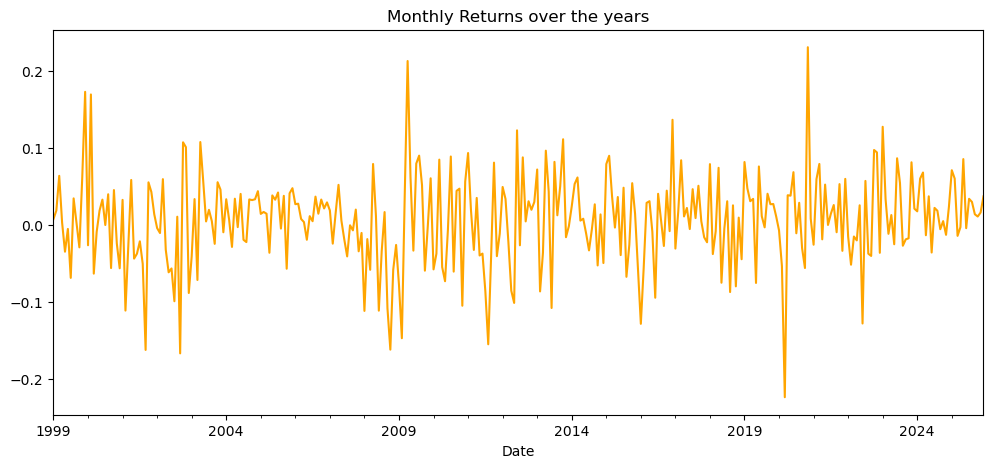

In [51]:
prices['Return'].plot.line(title="Monthly Returns over the years", color="orange", figsize=(12,5))

In [52]:
print("The HIGHEST return ever was --> ",max(prices["Return"])," and was registered on ",prices["Return"].idxmax())
print("The LOWEST return ever was --> ",min(prices["Return"])," and was registered on ",prices["Return"].idxmin())

The HIGHEST return ever was -->  0.23055003801621154  and was registered on  2020-11-01 00:00:00
The LOWEST return ever was -->  -0.2242925421730808  and was registered on  2020-03-01 00:00:00


### So we have found out that FTSEMIB:
- Had its Best Monthly Return on _**November 2020**_ of precisely _**+23,06%**_
- Had its Worst Montlhy Return on _**March 2020**_ with a heavy _**-22,43%**_


# 3) Risk Analysis: Volatility, Risk-Return Ratio, Sharpe Ratio, Drawdown


#### _Annualized Returns_

In [53]:
n_months=prices.shape[0] # total number of months in the csv prices
annualized_returns=np.prod(prices['Return']+1)**(12/n_months) - 1 
print(annualized_returns)

0.045781541723539876


- We have found Annualized Returns of **_+4,58%_** which tells us that the FTSEMIB over the sample period returned a geometric average return of **_+4,58% per year_**

#### _Annualized Volatility_

In [54]:
annualized_volatility=prices['Return'].std()*np.sqrt(12)
print(annualized_volatility)

0.20349729844581904


- We have found an annualized volatility of **_20,35%_** which tells us that assuming a normal distribution (and we will have more in depth analysis later to check this) FTSEMIB's returns can fall between $\mathbf{+20,35\%}$ or $\mathbf{-20,35\%}$ of its expected return over a one-year period.

#### _Risk-Reward Ratio_

In [55]:
risk_reward=annualized_returns/annualized_volatility
print(risk_reward)

0.22497370762752


- We found a Risk-Reward Ratio of **_0,225_** which reflects the annualized returns that we had found before

#### _Sharpe Ratio_

The Sharpe Ratio is defined as followed: **$$S = \frac{R_p - R_f}{\sigma_p}$$** Where:

- $R_p$: Portfolio Risk Adjusted Return (Annualized Return)
- $R_f$: Risk-Free Rate (We will use the EURIBOR 1MONTH)
- $R_p - R_f$: Excess Return (The Numerator)
- $\sigma_p$: Standard Deviation of Portfolio Returns

We use the **Sharpe Ratio** number as an indicator on how well the investment is compensating the investor for the risk taken



### Focusing on finding our $R_f$ 
We first start by importing our csv with EURIBOR 1 MONTH from the european central bank website (https://data.ecb.europa.eu/data/datasets/FM/FM.M.U2.EUR.RT.MM.EURIBOR1MD_.HSTA), cleaning the data and reorganizing the columns exactly as we have done previously with the historical data of FTSEMIB.

In [56]:
bonds_y=pd.read_csv("EURIBOR1MONTH.csv", header=0, index_col=0, parse_dates=True, na_values=-99.99,)
## We are now filtering from 1999 inwards because the FTSEMIB dataset starts from the same date and we want to have coherent values
bonds_y_filtered = bonds_y[bonds_y.index >= '1999-01-01']
bonds_y=bonds_y_filtered
bonds_y = bonds_y.sort_index(ascending=True)
bonds_y

,TIME PERIOD,"Euribor 1-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR1MD_.HSTA)"
DATE,,
1999-01-31,1999Jan,3.1583
1999-02-28,1999Feb,3.1264
1999-03-31,1999Mar,3.0548
1999-04-30,1999Apr,2.6947
1999-05-31,1999May,2.5661
...,...,...
2025-08-31,2025Aug,1.8900
2025-09-30,2025Sep,1.8972
2025-10-31,2025Oct,1.9063


***Cleaning the data as done before:***

In [57]:
del bonds_y["TIME PERIOD"]
bonds_y.columns=["Yield"]

In [58]:
bonds_y["Yield"]=bonds_y["Yield"]/100.0

In [59]:
bonds_y

,Yield
DATE,
1999-01-31,0.031583
1999-02-28,0.031264
1999-03-31,0.030548
1999-04-30,0.026947
1999-05-31,0.025661
...,...
2025-08-31,0.018900
2025-09-30,0.018972
2025-10-31,0.019063


***We can now compute the average of the annuals bond yield that we have which will be our risk free rate for this application:***

In [60]:
risk_free_rate=bonds_y["Yield"].mean()
print("Our risk free rate will be -> ",risk_free_rate)

Our risk free rate will be ->  0.015640388888888888


### **So we have computed a risk free rate of _1,56%_**

#### We can plot the bonds yield curve to see how it changed during the years

<Axes: title={'center': 'Bonds Yield (Risk Free Rate) during the years'}, xlabel='DATE'>

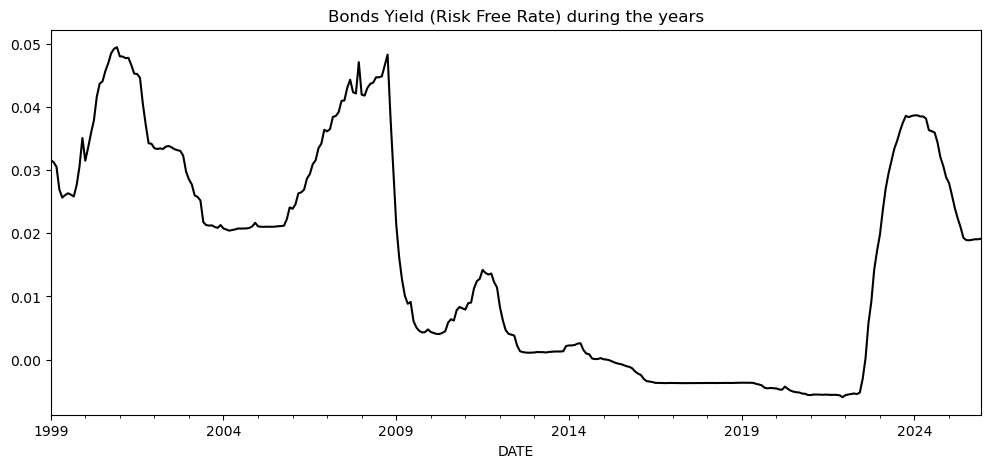

In [61]:
bonds_y["Yield"].plot.line(color="black", title="Bonds Yield (Risk Free Rate) during the years", figsize=(12,5))

#### Back to our ***Sharpe Ratio*** **$$S = \frac{R_p - R_f}{\sigma_p}$$**

In [62]:
#We now have the risk free rate so we can compute the sharpe ratio
risk_free_rate
annualized_returns
annualized_volatility
Sharpe_Ratio=(annualized_returns-risk_free_rate)/annualized_volatility
print("The Sharpe Ratio is --> ",Sharpe_Ratio)

The Sharpe Ratio is -->  0.14811573944641845


#### We have now found out that the sharpe ratio is ***0,15***

#### So we have found out that FTSEMIB:
- Has performed ***slightly better than the 1month EURIBOR*** (our risk free rate), because the ratio is positive  
- Has a **low** sharpe ratio (**0.15**) which indicates that ***the returns only slightly compensated the investor for the risk taken***

Let's move to the last part of this second section


#### _Drawdown_

##### To compute the drawdown, which is the wealth value as a percentage of the previous peak (in short, the maximum amount of money that you could have lost by buying at the top and selling at the bottom, pricewise)
1) Compute Wealth index (value of a portfolio as it compounds over time)
2) Compute previous peaks
3) Compute drawdown 

In [63]:
# 1) Let's create a portfolio of 10000 eur and see how it compounds over the years
wealth_index= pd.DataFrame(10000 *(1+prices['Return']).cumprod())
wealth_index.columns=["Wealth"]
wealth_index.head()

,Wealth
Date,
1999-01-01,10073.000000
1999-02-01,10257.220272
1999-03-01,10907.771787
1999-04-01,10936.323589
1999-05-01,10551.566536


Let's plot our portfolio during the years, supposing that we have invested on the first available date, that is 1 January 1998 and that we didn't invest anything more afterwards:

<Axes: title={'center': 'Portfolio Value over Time'}, xlabel='Date'>

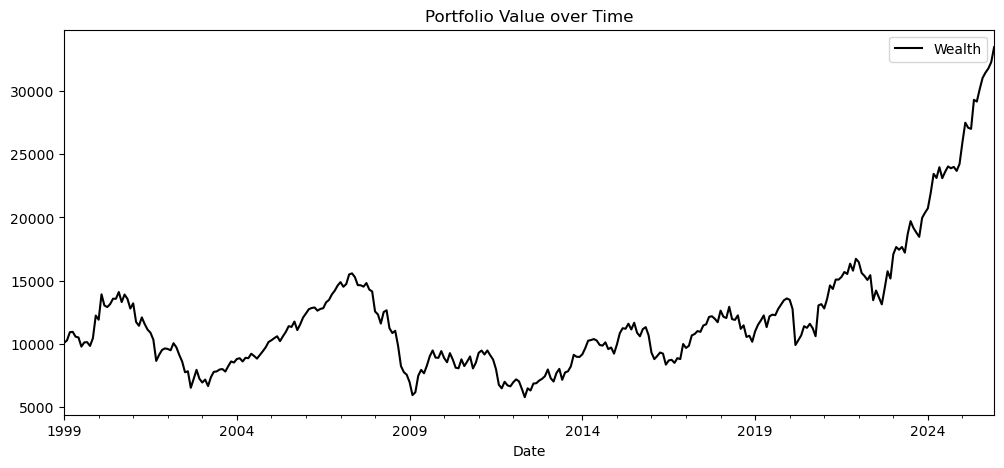

In [64]:
wealth_index.plot(title="Portfolio Value over Time", color="black", figsize=(12,5))

#### And this is the graphical representation of our portfolio during the years in the sample period.

#### Let's now compute the previous peaks and put them in a graph


In [65]:
wealth_index.dropna()
previous_peaks= wealth_index.cummax()
previous_peaks

,Wealth
Date,
1999-01-01,10073.000000
1999-02-01,10257.220272
1999-03-01,10907.771787
1999-04-01,10936.323589
1999-05-01,10936.323589
...,...
2025-08-01,31053.788502
2025-09-01,31472.284542
2025-10-01,31803.765699


<Axes: title={'center': 'Previous peaks over time'}, xlabel='Date'>

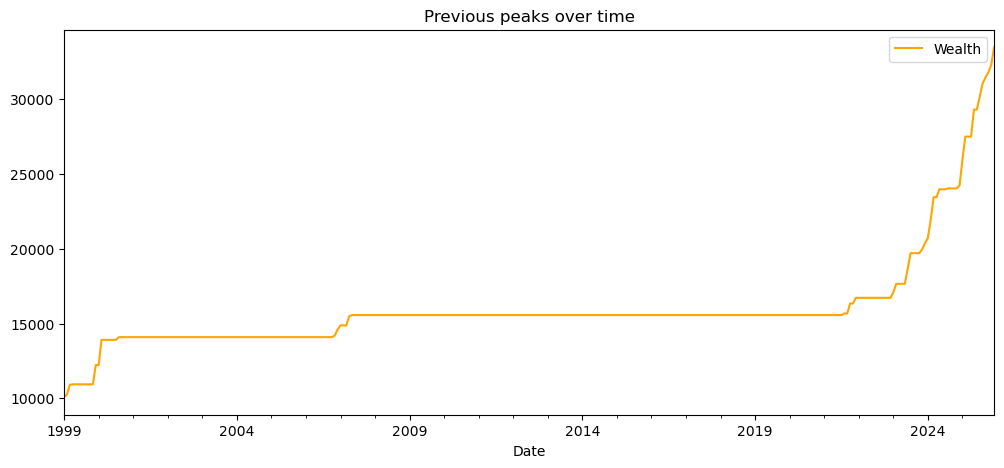

In [66]:
previous_peaks.plot.line(title="Previous peaks over time", color="orange", figsize=(12,5))

#### And Finally we can compute drawdown:

In [67]:
drawdown= (wealth_index-previous_peaks)/previous_peaks
drawdown.columns=["Drawdown"]
drawdown

,Drawdown
Date,
1999-01-01,0.000000
1999-02-01,0.000000
1999-03-01,0.000000
1999-04-01,0.000000
1999-05-01,-0.035182
...,...
2025-08-01,0.000000
2025-09-01,0.000000
2025-10-01,0.000000


<Axes: title={'center': 'Drawdown over Time'}, xlabel='Date'>

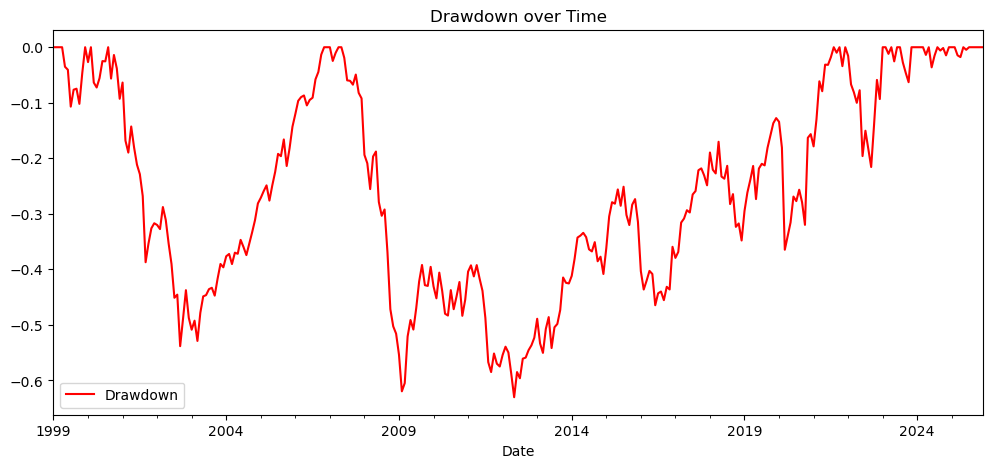

In [68]:
drawdown.plot.line(title="Drawdown over Time",color="red", figsize=(12,5))

To see when whe had it and what was the maximum and minimum drawdown, we do the same thing that we did with the returns

In [69]:
print('The maximum drawdown was ',drawdown.min()," and it was on ", drawdown.idxmin())   

drawdown = drawdown[drawdown["Drawdown"] != 0] #removing 0

print('The minimum drawdown (non zero) was ', drawdown.max()," and it was on ", drawdown.idxmax())

The maximum drawdown was  Drawdown   -0.630254
dtype: float64  and it was on  Drawdown   2012-05-01
dtype: datetime64[ns]
The minimum drawdown (non zero) was  Drawdown   -0.001426
dtype: float64  and it was on  Drawdown   2024-10-01
dtype: datetime64[ns]


So, with the drawdown we have found out
- A maximum drawdown of **-63,03%** on ***May 2012*** and a minimum of **-0,14%** on ***October 2024***

#### To finish this section, to have a comprehensive overview, let's plot our wealth index and the previous peaks together:

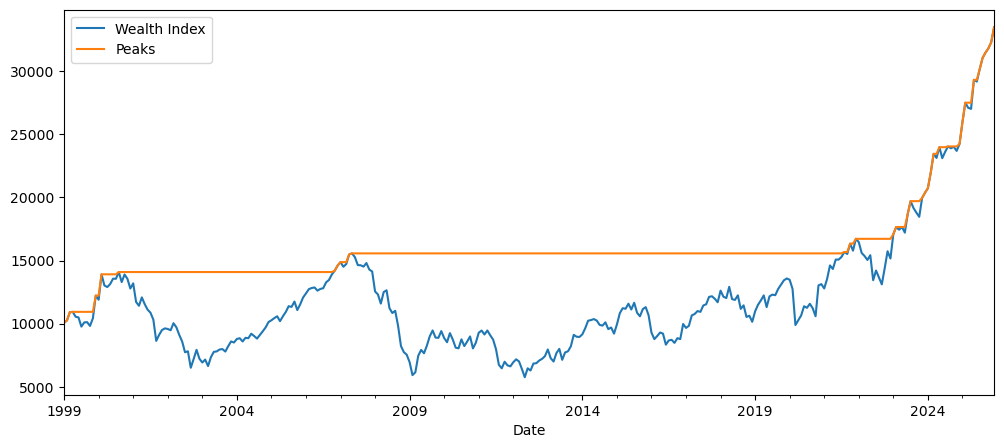

In [70]:
fig, ax = plt.subplots(figsize=(12,5))

wealth_index.plot(ax=ax, legend=False)
previous_peaks.plot(ax=ax, legend=False)

ax.lines[0].set_label("Wealth Index")
ax.lines[1].set_label("Peaks")

ax.legend()
plt.show()

# 4) Deviations of returns from normality: Skewness, Kurtosis

#### _Skewness_ $$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$

In [71]:
r=prices['Return']
r_minus_E= r - r.mean()
sigma_r = r.std(ddof=0) # We use the population standard deviation, so we set ddof=0
e = (r_minus_E**3).mean()
skewness=e/sigma_r**3
print("The skewness of our returns is --> ", skewness)

The skewness of our returns is -->  -0.1641310672609036


 We have found a **skewness** of the returns of **_-0,16_** which tells us that the data in question is **slightly skewed to the left** (a normal distribution has a skewness of 0) and this, more importanlty tells us that in the FTSEMIB **_the potential for large, negative returns is somewhat higher than the potential for large, positive returns_**.

#### _Kurtosis_ $$ S(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

In [72]:
r=prices['Return']
r_minus_E= r - r.mean()
sigma_r = r.std(ddof=0) # use the population standard deviation, so set ddof=0
e = (r_minus_E**4).mean()
kurtosis=e/sigma_r**4
print("The kurtosis of our returns is --> ", kurtosis)

The kurtosis of our returns is -->  4.679158086045788


We have found a **kurtosis** of the returns of **_4,68_** which tells us that ***FSEMIB returns have an excess kurtosis of 1,68***. (A normal distribution has a kurtosis of 3,0).

This excess, more importanlty tells us that in the FTSEMIB the **distribution of returns has fatter tails and a more peaked center** than a normal distribution and all of this translates in **a higher probability of extreme outcomes, both very positive and very negative, than the normal distribution of returns** adding precious insights about the risk associated with this index.

#### Quick graph to have a comparison between the monthly returns that we have found at the start, and the normal distribution:

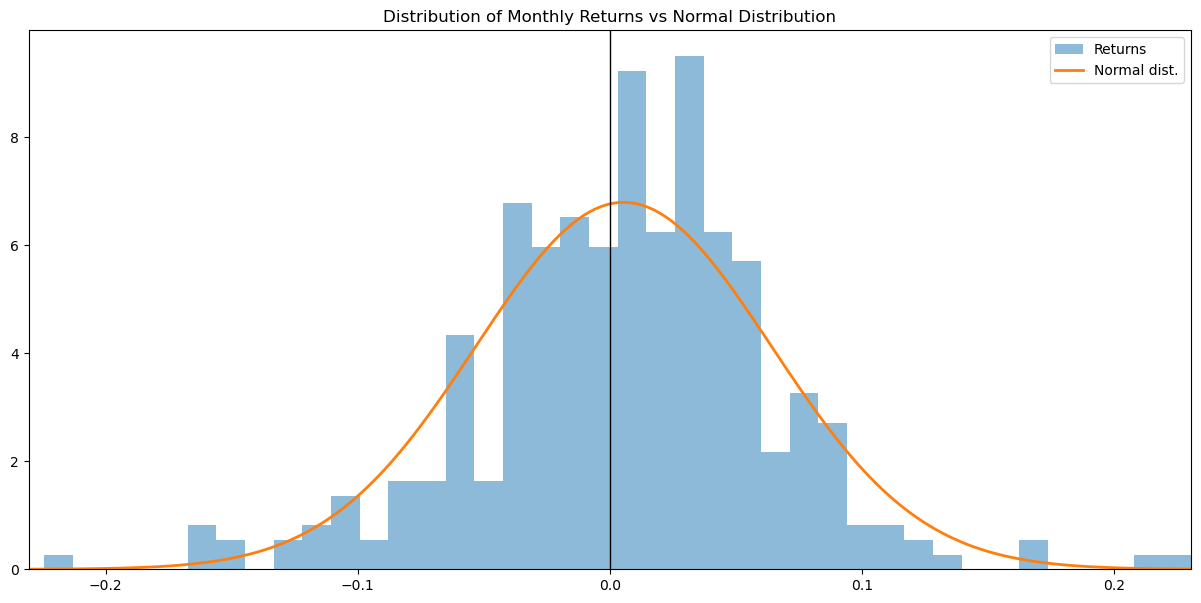

In [73]:
ret = prices['Return'].dropna()
mu = ret.mean()
sigma = ret.std()
max_abs = np.abs(ret).max()
x = np.linspace(-max_abs, max_abs, 200) # symmetric range around 0

plt.figure(figsize=(15,7))
plt.hist(ret, bins=40, density=True, alpha=0.5, label='Returns') # histogram of the returns
plt.plot(x, stats.norm.pdf(x, mu, sigma), linewidth=2, label='Normal dist.') #this is the gaussian curve

plt.axvline(0, color='black', linewidth=1) # a vertical line at x= 0 to show the results
plt.title("Distribution of Monthly Returns vs Normal Distribution")
plt.xlim(-max_abs, max_abs) # force symmetric axis to center 0
plt.legend()
plt.show()


# 5) Downside Measures: Calmar Ratio, Semideviation, Sortino Ratio, Historic Var, Gaussian Var, Modified Cornish-Fisher VaR

#### _Calmar Ratio_

#### $$Calmar\ Ratio = \frac{R_p}{|MDD|}$$
Where:
- $R_p$: Annualized returns
- $|MDD|$: Absolute value of the Maximum Drawdown 
- $Peak$: The highest value of the portfolio before a decline
##### The Calmar Ratio gives us a measure of return relative to drawdown risk, telling us how much return an investment generates for every unit of maximum risk endured over a specific timeframe

- Less than 0,5 = weak
- Almost 1 = decent
- More than 2 = strong

In [74]:
calmar_ratio=annualized_returns/(-drawdown.min())
print("The Calmar Ratio was --> ",calmar_ratio)

The Calmar Ratio was -->  Drawdown    0.07264
dtype: float64


We have found a **Calmar Ratio** of ***0,07*** which tells us that the FTSEMIB has very weak performance once we adjust for maximum drawdown. More importantly, this means that the annual returns were small compared to the size of the worst crash, so investors were not well compensated for the drawdown risk taken.

#### _Semideviation_

#### $$\sigma_{semi} = \sqrt{\frac{1}{N} \sum_{R_i \le \bar{R}} (R_i - \bar{R})^2}$$
Where:
- $N$ Number of observations
- $R_i$: Individual return, i-th return at a specific point in time $i$
- $\bar{R}$ : Mean return
- $(R_i - \bar{R})^2$: squared deviation from the mean of the returns
- $R_i \le \bar{R}$: Filter for the summation to restrict it to include only those returns ($R_i$) that are less than or equal to the mean return

##### The Semi-deviation gives us the volatility of the sub-sample of below average (or below zero) returns and it tells us how large and how frequent the negative deviations are

In [75]:
#Let's start
dmr=prices['Return']- prices['Return'].mean()    # We subtract the mean from the returns ---> dmr= demeaned r
dmr_negative = dmr[dmr<0]                        # We take only the returns below the mean
dmr_negative_square = dmr_negative**2            # We square the demeaned returns below the mean
n_negative = (dmr<0).sum()                       # number of returns under the mean
semideviation=(dmr_negative_square.sum() / n_negative) ** 0.5
print("The semideviation of FTSEMIB is ", semideviation)


The semideviation of FTSEMIB is  0.061878040537490256


 We have found a **semi-deviation** of the returns of FTSEMIB of ***6,19%*** , meaning an average risk for downside at any given point of ***6.19%***.

#### _Sortino Ratio_

#### $$\text{Sortino Ratio} = \frac{\bar{R} - R_f}{\sigma_{semi}}$$
##### The Sortino Ratio gives us a measure of how much return an investment generates per unit of downside risk, accounting for the risk-free rate.

In [76]:
semideviation_annual = semideviation * (12 ** 0.5) #we annualize the semideviation
sortino_ratio= (annualized_returns - risk_free_rate)/semideviation_annual
print("The Sortino Ratio is ",sortino_ratio)

The Sortino Ratio is  0.1406153342252975


We have found a **Sortino Ratio** of the returns of ***0,14*** meaning that the returns slightly surpassed the risk free rate, but only provided weak risk-adjusted performance, ***even when only considering downside risk***.

#### _Historic Var_

In [77]:
returns=prices['Return']
nareturns=returns.dropna() #we create a series without na values
historic_var = -np.percentile(nareturns, 5) #we calculate the return of the 5% percentile, - because it will be negative
print("The Historic Var for the FTSEMIB is ",historic_var)

The Historic Var for the FTSEMIB is  0.0940761108219512


We have found an **Historic monthly VaR** at the 5% level of the returns of ***9,41%*** meaning that if you had invested in FTSEMIB, there would have been a **5% probability of the index losing 9,41% or more in one single period**.

#### _Gaussian Var_

$$VaR_α=−(μ+z_ασ)$$

In [78]:
from scipy.stats import norm
nareturns = returns.dropna()
mu = nareturns.mean() #mean
sigma = nareturns.std() #standard deviation
z = norm.ppf(0.05)  #we search the z score for the 5% confidence level
print("μ= ",mu)
print("σ= ",sigma)
print("Confidence level 5%")
print("Z score -> ",z)

gaussian_var = -(mu + z * sigma) # gaussian var equation
print("The Gaussian VaR of FTSEMIB is ", gaussian_var)

μ=  0.005471545401033487
σ=  0.05874461001852762
Confidence level 5%
Z score ->  -1.6448536269514729
The Gaussian VaR of FTSEMIB is  0.09115473945179149


We have found a ***Gaussian VaR*** of ***9,12%*** this tells us that assuming returns follow a normal distribution, **there is a 5% probability of losing 9,12% or more in one single period**.

#### _Modified Cornish-Fisher VaR_

#### $$ \tilde{z}_{\alpha} = z_{\alpha} + \frac{1}{6}(z_{\alpha}^2 - 1)S + \frac{1}{24}(z_{\alpha}^3 - 3z_{\alpha})(K - 3) - \frac{1}{36}(2z_{\alpha}^3 - 5z_{\alpha})S^2 $$
The Modified Cornish-Fisher VaR adjusts the z score based on the real values of the skewness and kurtosis distributions of our FTSEMIB returns and thus it is not based on the normal distribution default values.

In [79]:
#We set into the equation our previously found values of the skewness and kurtosis
s = skewness 
k = kurtosis
z = (z +(z**2 - 1)*s/6 +(z**3 - 3*z)*(k-3)/24 -(2*z**3 - 5*z)*s**2/36) 
from scipy.stats import norm #just in case i forget to execute the previous box
nareturns = returns.dropna()
cornish_fisher_var=-(nareturns.mean() + z*r.std(ddof=0))
print("The Modified Cornish-Fisher VaR is ",cornish_fisher_var )


The Modified Cornish-Fisher VaR is  0.09172477002913756


We have found a Cornish–Fisher VaR of ***9,17%*** meaning that **there is a 5% probability** (based on our parametric model adjusted for skewness and kurtosis) **of losing 9,17% in one period**

### Now that we have found this three measures of VaR, it's interesting to plot them in a bar chart to see their differences:

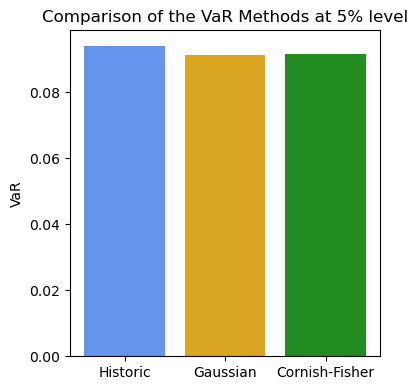

In [80]:
labels = ['Historic', 'Gaussian', 'Cornish-Fisher']
values = [float(historic_var), float(gaussian_var), float(cornish_fisher_var)]  # We make everything a float to avoid errors

plt.figure(figsize=(4,4))
plt.bar(labels, values, color=['cornflowerblue', 'goldenrod', 'forestgreen'])
plt.ylabel('VaR')
plt.title('Comparison of the VaR Methods at 5% level')
plt.tight_layout()
plt.show()

##### With this graph we can clearly see that the Historic Var method gives the highest 5% VaR, while the Gaussian method gives the lowest, with the more precise Cornish-Fisher VaR in between.

# **Conclusion**

### **In conclusion, during our analysis we have found out that:**
### Returns:
- FTSEMIB had its Best Monthly Return on _**November 2020**_ of precisely _**+23,06%**_.
- FTSEMIB had its Worst Montlhy Return on _**March 2020**_ with a heavy _**-22,43%**_.
- FTSEMIB has, over the entire sample, annualized returns of **_+4,58%_**.
### Risks:
- We have found an annualized volatility of **_20,35%_** which tells us that assuming a normal distribution (and we will have more in depth analysis later to check this) FTSEMIB's returns can fall between $\mathbf{+20,35\%}$ or $\mathbf{-20,35\%}$ of its expected return over a one-year period.
- We found a Risk-Reward Ratio of **_0,225_** which reflects the annualized returns that we had found before.
- We have found a Risk-Free return of **_3,71%_** by looking at the historical annual returns of the 10Y Italian goverment bonds as a reference and taking the average.
- We have a Sharpe Ratio of **_015_** which indicates that the index has performed indicates that ***the returns only slightly compensated the investor for the risk taken***
- We have computed Drawdowns for FTSEMIB and found a maximum drawdown of **-63,03%** on ***May 2012*** and a minimum of **-0,14%** on ***October 2024***.
### Non-Normality of the Returns:
 We have found a **skewness** of the returns of **_-0,16_** which tells us that the data in question is **slightly skewed to the left** (a normal distribution has a skewness of 0) and this, more importanlty tells us that in the FTSEMIB **_the potential for large, negative returns is somewhat higher than the potential for large, positive returns_**.
-We have found ***an excess kurtosis of 1,68***, that tells us that in the FTSEMIB the **distribution of returns has fatter tails and a more peaked center** than a normal distribution and all of this translates in **a higher probability of extreme outcomes, both very positive and very negative, than the normal distribution of returns**.
### Downside Measures:
- We have found a **Calmar Ratio** of ***0,07*** which tells us that the FTSEMIB has very weak performance once we adjust for maximum drawdown. More importantly, this means that the annual returns were small compared to the size of the worst crash, so investors were not well compensated for the drawdown risk taken.
-   We have found a **semi-deviation** of the returns of FTSEMIB of ***6,19%*** , meaning an average risk for downside at any given point of ***6.19%***
-  We have found a **Sortino Ratio** of the returns of ***0,14*** meaning that the returns slightly surpassed the risk free rate, but only provided weak risk-adjusted performance, ***even when only considering downside risk***.
-  We have found an **Historic monthly VaR** at the 5% level of the returns of ***9,41%*** meaning that if you had invested in FTSEMIB, there would have been a **5% probability of the index losing 9,41% or more in one single period**.
-  We have found a ***Gaussian VaR*** of ***9,12%*** this tells us that assuming returns follow a normal distribution, **there is a 5% probability of losing 9,12% or more in one single period**.
-  We have found a Cornish–Fisher VaR of ***9,17%*** meaning that **there is a 5% probability** (based on our parametric model adjusted for skewness and kurtosis) **of losing 9,17% in one period**

### **Final take:**
The FTSEMIB gave moderate long-term returns (+4.58% per year), but it was very risky and had big crashes (worst drawdown -63.03%).

On a risk-adjusted level, it was not great: the Sharpe (0.15) and Sortino (0.14) are low, so returns only slightly paid you for the risk you took, especially compared to the risk-free rate (3.71%).

Also, returns are not normal: they have fatter tails, meaning extreme moves happen more often than a normal model would predict. This matches the VaR results (about a 9% monthly loss in the worst 5% of months).

So overall: ***FTSEMIB can grow over time, but you must accept high volatility and strong downside risk.***